# Import stuff

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Import dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='utf-8')

The `index_col=0` argument says to treat the first column as ID column of the dataframe

# Check the dataset

In [12]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
#Number of rows and number of columns
df.shape

(800, 12)

In [15]:
#All column names
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Visualize

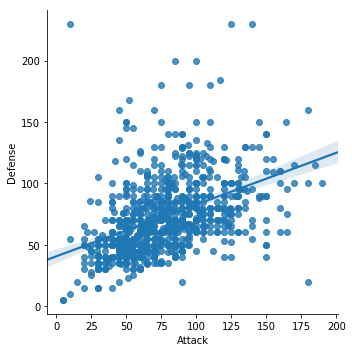

In [13]:
#Basic scatter plot
sns.lmplot(x='Attack', y='Defense', data=df)

Seaborn has no builtin scatter plot. To create a scatter plot, just set `fit_reg=False`.

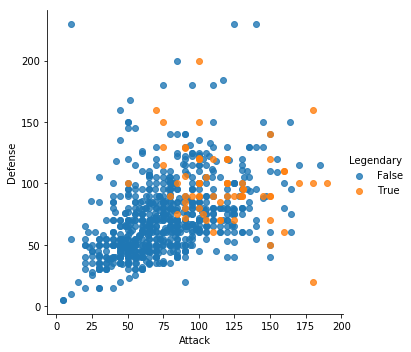

In [22]:
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False,
          hue='Legendary')

#For reference, setting x and y limits
plt.ylim(0, None)
plt.xlim(0, None)

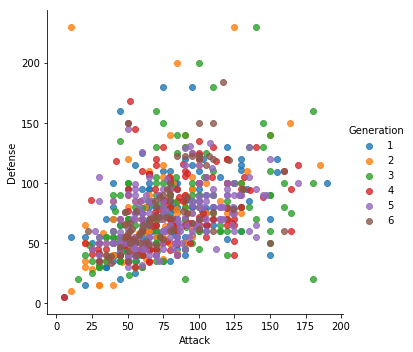

In [25]:
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False,
          hue='Generation')

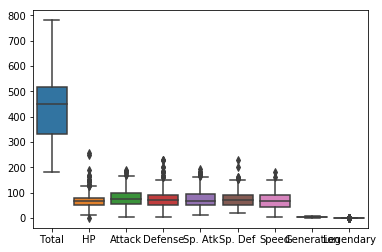

In [24]:
#Boxplot
sns.boxplot(data=df)

Drop Total because already have individual stats, and drop Generation and Legendary because they are not combat stats.

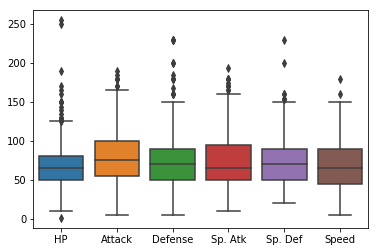

In [26]:
#Formatted dataframe with combat stats only
stats_df = df.drop(['Total', 'Generation', 'Legendary'], axis=1)

#Plot
sns.boxplot(data=stats_df)

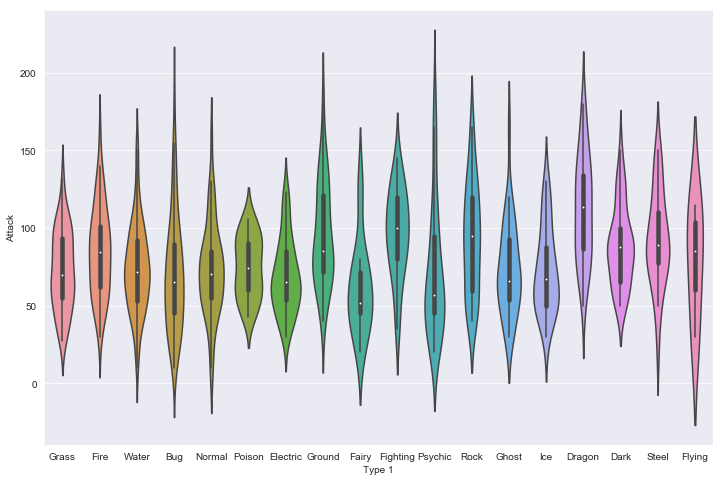

In [29]:
#Set theme
sns.set_style('darkgrid')

#Violin plot
plt.figure(figsize=(12,8))
sns.violinplot(x='Type 1', y='Attack', data=df)

Used <a href=''>Bulbapedia</a> to get colors for Pokemons characters:

In [30]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

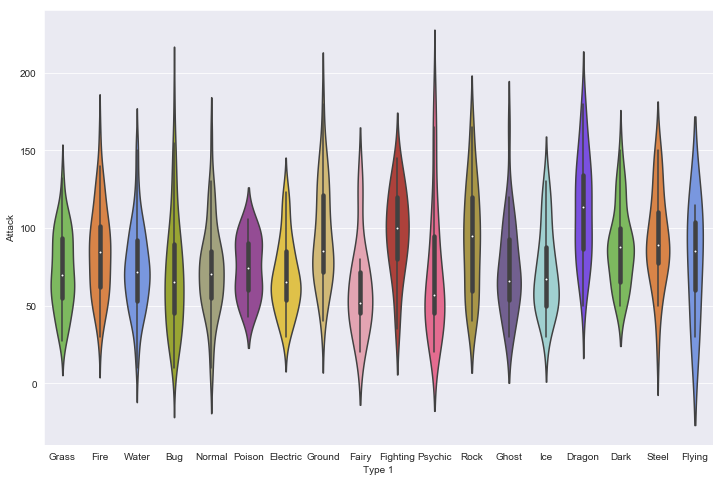

In [33]:
#Coloring with proper Pokemon colors palette
plt.figure(figsize=(12,8))
sns.violinplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors, ax=ax)

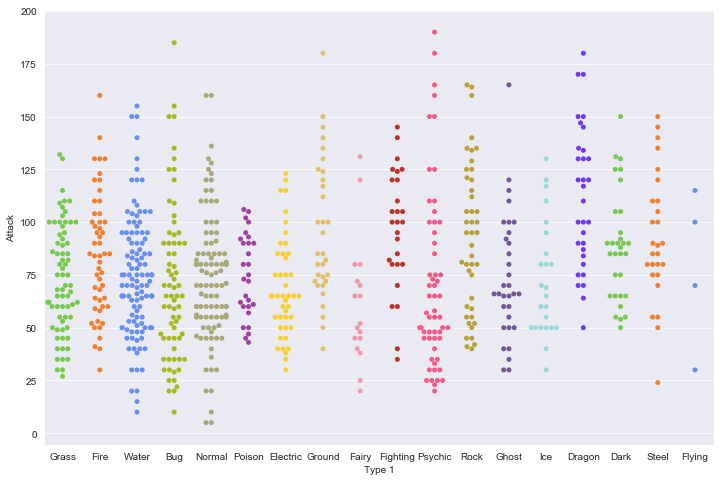

In [52]:
#Swarm plots
plt.figure(figsize=(12,8))
sns.swarmplot(x='Type 1', y='Attack', data=df,
             palette=pkmn_type_colors)

Swarm plots and violin plots show the same thing. So we can overlay them:

Text(0.5,1,'Attack by Type')

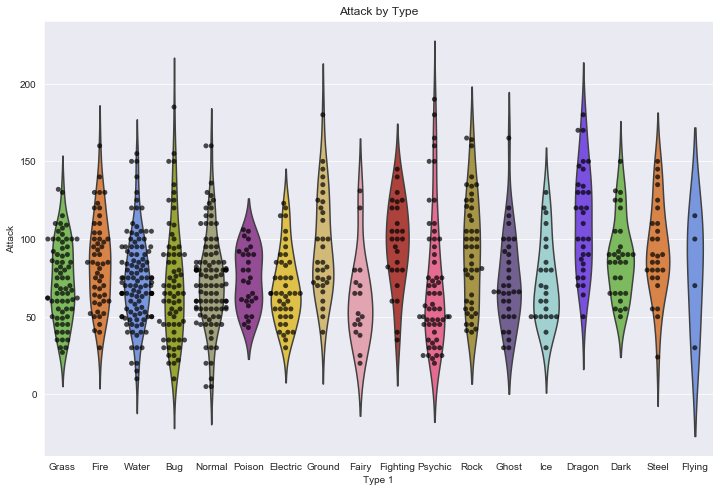

In [53]:
#Set figure size
plt.figure(figsize=(12,8))

#Create plots
sns.violinplot(x='Type 1', y='Attack', data=df,
              inner=None, #Remove the bars inside the violins
              palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df,
             color='k', alpha=0.7)

#Set title
plt.title('Attack by Type')

# Melting the dataframe

In [54]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [56]:
#Melt the data
melted_df = pd.melt(stats_df,
                   id_vars=['Name', 'Type 1', 'Type 2'], #Vars to keep
                   var_name='Stat') #Name of melted var

melted_df.head(20)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39
5,Charmeleon,Fire,NaN,HP,58
6,Charizard,Fire,Flying,HP,78
7,CharizardMega Charizard X,Fire,Dragon,HP,78
8,CharizardMega Charizard Y,Fire,Flying,HP,78
9,Squirtle,Water,NaN,HP,44


Now, I can set `x='Stat'` and `y='value'` so that swarms are seperated by stat. Setting `hue='Type 1'` will color the points by Pokemon type.

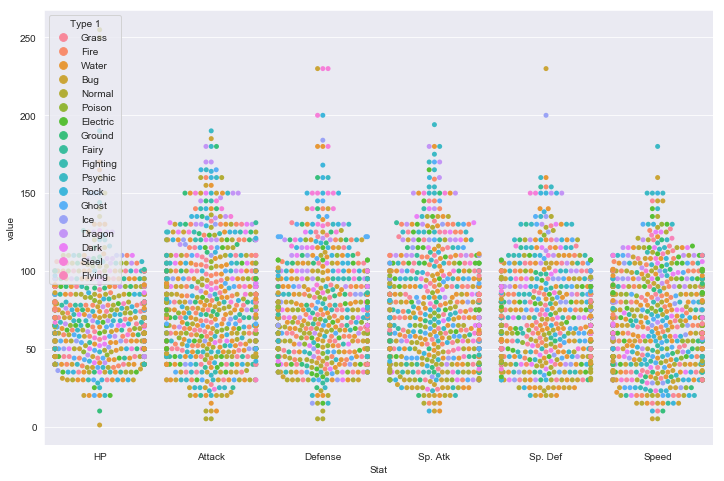

In [58]:
#Swarmplot with melted_df
plt.figure(figsize=(12,8))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

Tweaking the above plot a little further to get a readable plot:

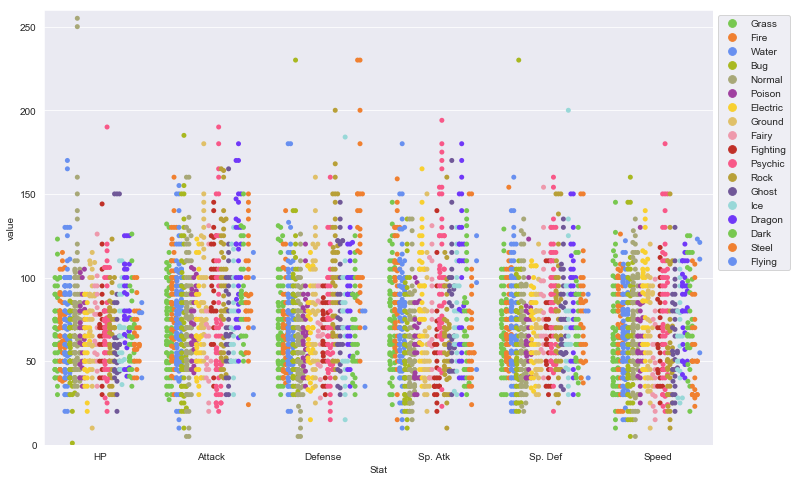

In [60]:
#Set size
plt.figure(figsize=(12,8))

#Plot
sns.swarmplot(x='Stat',
             y='value',
             data=melted_df,
             hue='Type 1',
             dodge=True, #Seperate points by hue
             palette=pkmn_type_colors) #Color them by Pokemon colors

#Adjust y-axis
plt.ylim(0, 260)

#Move the legend
plt.legend(bbox_to_anchor=(1,1), loc=2)

# Additional plotting

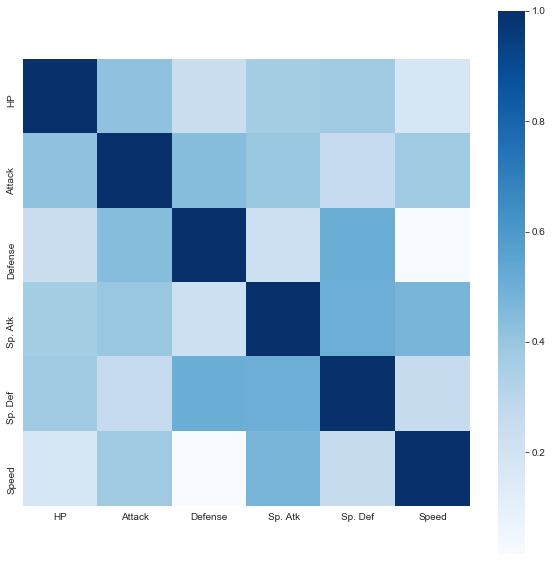

In [66]:
#Calculate correlations
corr = stats_df.corr()

#Plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', square=True)

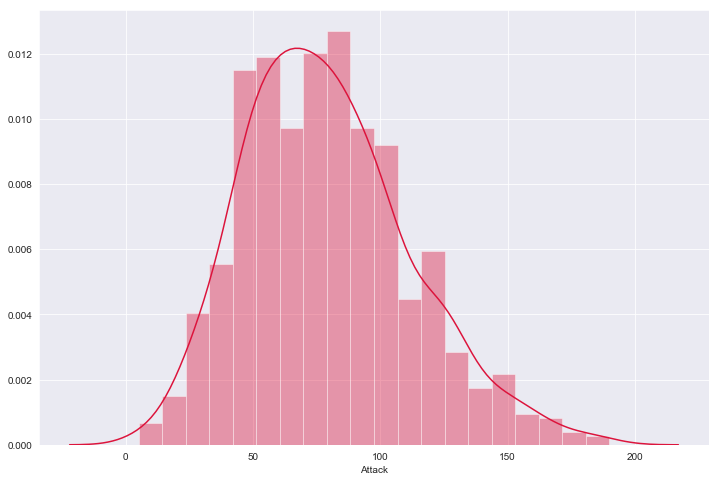

In [68]:
#Distribution plot/Histogram
plt.figure(figsize=(12,8))
sns.distplot(df.Attack, color='crimson')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

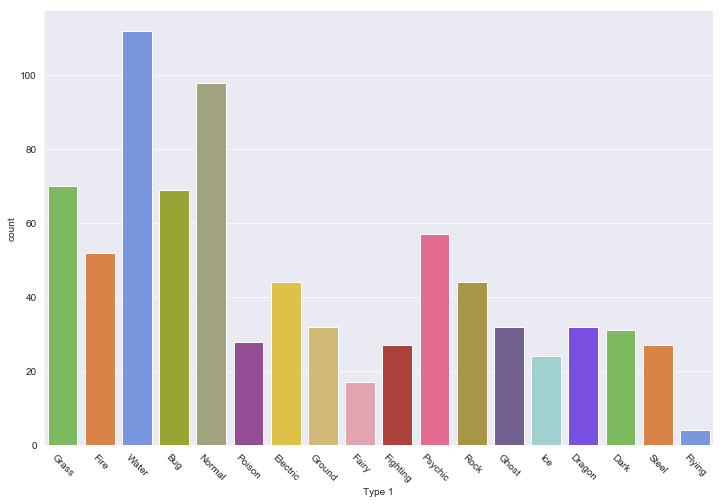

In [70]:
#Count plot/Bar plot
plt.figure(figsize=(12,8))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

#Rotate x-labels
plt.xticks(rotation=-45)

Below, I use `set_xticklabels()` because, unlike in the above plot, `xticks()` will only rotate labels of the last plot.

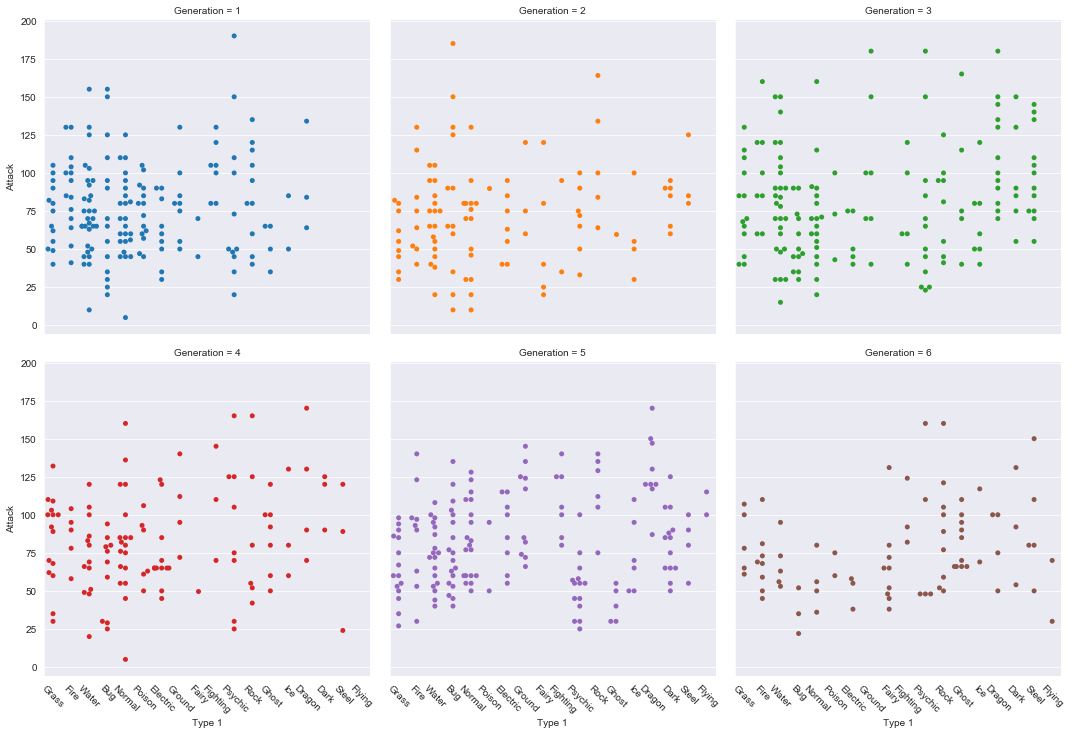

In [77]:
#Factor plot
g = sns.catplot(x='Type 1',
                  y='Attack',
                  data=df,
                  hue='Generation',
                  col='Generation',
                col_wrap=3,
                  kind='swarm')

#Rotate x-axis labels
g.set_xticklabels(rotation=-45)

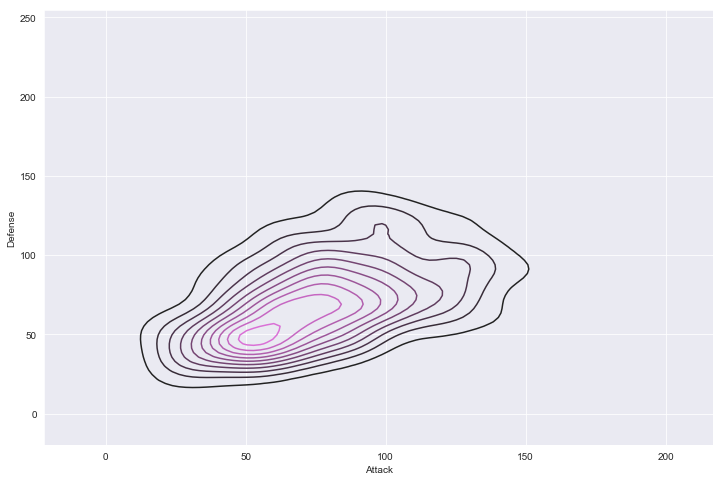

In [80]:
#Density plot
plt.figure(figsize=(12,8))
sns.kdeplot(df.Attack, df.Defense, color='orchid')

<Figure size 864x576 with 0 Axes>

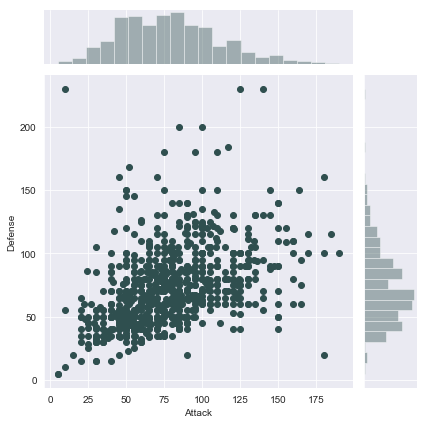

In [84]:
#Joint distribution plot
plt.figure(figsize=(12,8))
sns.jointplot(x='Attack', y='Defense', data=df, color='darkslategrey')

<Figure size 864x576 with 0 Axes>

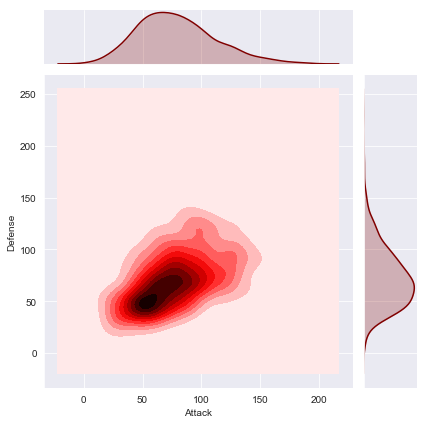

In [87]:
#Joint distribution plot
plt.figure(figsize=(12,8))
sns.jointplot(x='Attack', y='Defense', data=df, 
              color='maroon',
             kind='kde')

<Figure size 864x576 with 0 Axes>

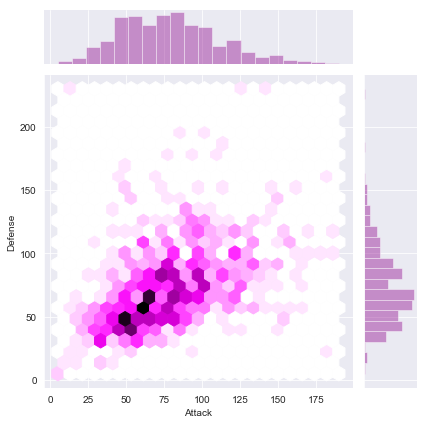

In [89]:
#Joint distribution plot
plt.figure(figsize=(12,8))
sns.jointplot(x='Attack', y='Defense', data=df, 
              color='darkmagenta',
             kind='hex')

Inspired by <a href='https://elitedatascience.com/python-seaborn-tutorial'>this</a> tutorial at EliteDataScience.